**Цель проекта:** провести приоритизацию гипотез для увеличения выручки интернет-магазина, запустить A/B тест и проанализировать полученные результаты.

**Задачи**:

1. Приоритизировать гипотезы с помощью техник ICE и RICE.
2. Анализ A/B теста: 
   
   - построение графиков кумулятивной выручки, среднего чека, среднего количества заказов по группам A и B
   - поиск аномалий в значениях 
   - расчет статистической значимости между группами по сырым и "очищенным" данным

3. Выводы

**Данные:**

Таблица **hypothesis**:
    
    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 
    
Таблица **orders**: 

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.


Таблица **visitors**:
    
    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# для начала загрузим таблицу с гипотезами 
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
#применим фреймворк ICE
#формула ICE = Impact * Confidence / Efforts
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence']/hypothesis['Efforts'], 2)

In [5]:
hypothesis.sort_values(by = 'ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


В начале списка оказывается гипотеза **"Запустить акцию, дающую скидку на товар в день рождения	"**, так как оценено, что она имеет большое влияние на пользователей и средние усилия для реализации. 

In [6]:
#формула RICE = Reach * Impact * Confidence / Efforts
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']/hypothesis['Efforts']

In [7]:
hypothesis.sort_values(by = 'RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


С помощью техники RICE на первом месте гипотеза **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"**, так как она имеет максимальный балл в столбце Reach, то есть охватыет всех пользователей, также имеет достаточно высокий увроень влияние и уверенности в ней. 

In [8]:
hypothesis[['Hypothesis', 'ICE', 'RICE']].style.background_gradient()

,Hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000


В таблице видно, что для двух подходов порядок приоритета гипотез становится разным, но в целом есть точки пересечения - подчеркнутые цветом гипотезы, которые оказались в топе для одного и другого подхода. 

### Часть 2. Анализ A/B-теста

In [9]:
# загрузим данные о заказах и посетителях 
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
#проверим датафрейм на наличие дубликатов
orders.duplicated().value_counts()

False    1197
dtype: int64

Видно, что дубликатов нет. 

In [13]:
# приведем названия к нижнему регистру
orders = orders.rename({'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, axis = 'columns')

In [14]:
#пропусков нет
#необходимо перевести дату в формат datetime
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
# проверка на дубликаты
visitors.duplicated().value_counts()

False    62
dtype: int64

In [18]:
# переведем столбец с датой в формат datetime
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

In [19]:
#проверим, равное ли распределение пользователей по группам в тесте
orders.groupby('group')['transaction_id'].count()

group
A    557
B    640
Name: transaction_id, dtype: int64

In [20]:
#проверим, не попали ли пользователи в 2 группы сразу
orders.groupby('visitor_id').agg({'group': 'nunique'}).value_counts()

group
1        973
2         58
dtype: int64

**Выборки различаются по размеру**, в группе A на более чем 10% меньше людей. **Также 58 пользователей попали в 2 группы сразу, это менее 5% данных**, поэтому пока не будем их трогать.

#### 1. Постройте график кумулятивной выручки по группам.

In [21]:
#для начала рассчитаем кумулятивные величины для группы A
def cum_columns(group, users_list = None):
    
    if users_list == None:
        users_list = []
    
    table_cum = (
    orders.loc[(orders['group'] == group) & (~orders['visitor_id'].isin(users_list))]
    .groupby('date', as_index = False)
    .agg({'revenue': 'sum', 'transaction_id':'nunique', 'visitor_id': 'nunique'})
    .rename({'transaction_id': 'orders', 'visitor_id': 'buyers'}, axis = 'columns'))

#посчитаем куммулятивную revenue и количество заказов 
    table_cum[['cum_revenue', 'cum_orders', 'cum_buyers']] = table_cum[['revenue', 'orders', 'buyers']].cumsum()

    table_cum = table_cum.merge(visitors.query('group == @group'), left_on = 'date', right_on = 'date', how = 'left')
    table_cum['cum_visitors'] = table_cum['visitors'].cumsum()
    
    return table_cum

In [22]:
group_A = cum_columns("A")

In [23]:
group_A

,date,revenue,orders,buyers,cum_revenue,cum_orders,cum_buyers,group,visitors,cum_visitors
0,2019-08-01,148579,24,20,148579,24,20,A,719,719
1,2019-08-02,93822,20,19,242401,44,39,A,619,1338
2,2019-08-03,112473,24,24,354874,68,63,A,507,1845
3,2019-08-04,70825,16,15,425699,84,78,A,717,2562
4,2019-08-05,124218,25,25,549917,109,103,A,756,3318
5,2019-08-06,48484,18,15,598401,127,118,A,667,3985
6,2019-08-07,142417,18,18,740818,145,136,A,644,4629
7,2019-08-08,96279,16,16,837097,161,152,A,610,5239
8,2019-08-09,188506,16,14,1025603,177,166,A,617,5856
9,2019-08-10,210495,16,16,1236098,193,182,A,406,6262


In [24]:
group_B = cum_columns("B")

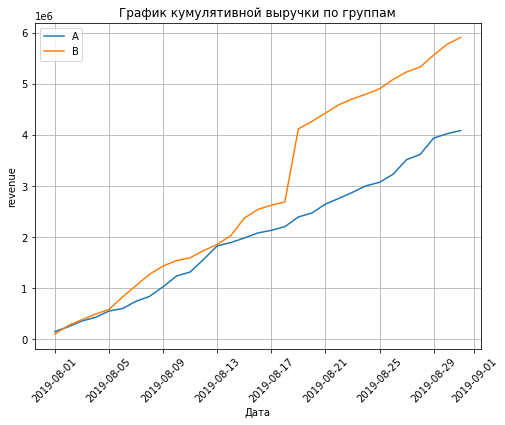

In [25]:
plt.figure(figsize = (8, 6))
plt.plot(group_A['date'], group_A['cum_revenue'], label = 'A')
plt.plot(group_B['date'], group_B['cum_revenue'], label = 'B')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation = 45)
plt.xlabel('Дата')
plt.ylabel('revenue')
plt.grid();

Из графика видно, что выручка кумулятивная выручка для двух групп увеличивается во время всего теста, при этом **кумулятивная выручка группы B всегда находилась выше**, кроме первых дней эксперимента. 

**Виден резкий скачек** в кумулятивной выручке **для группы B** после 17 числа, что может быть вызвано резким увеличением количества заказов или появлении очень дорогих заказах. Также стоит проверить не увеличилось ли число посетителей в эти даты для группы B.  

К концу месяца ***кумулятивная выручка группы A составляет 4 млн., группы B - 5,9 млн.***.

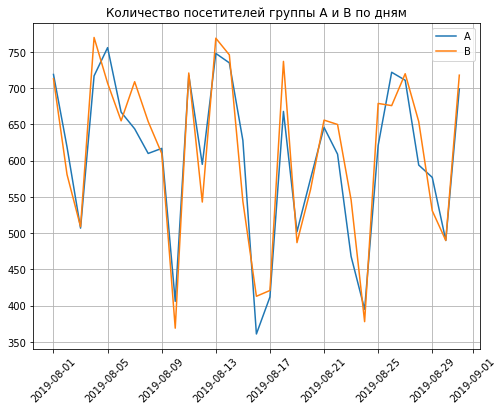

In [26]:
# проверим что не было всплесков посетителей
plt.figure(figsize = (8, 6))
plt.plot(visitors['date'].unique(), visitors.query('group == "A"')['visitors'], label = 'A')
plt.plot(visitors['date'].unique(), visitors.query('group == "B"')['visitors'], label = 'B')
plt.xticks(rotation = 45)
plt.title('Количество посетителей группы A и B по дням')
plt.legend()
plt.grid();

Из двух графиков видно, что количество посетителей распределяется почти одинаково для двух групп и **резкого всплеска после 17 числа не обнаружено.**

#### 2.Постройте график кумулятивного среднего чека по группам. 

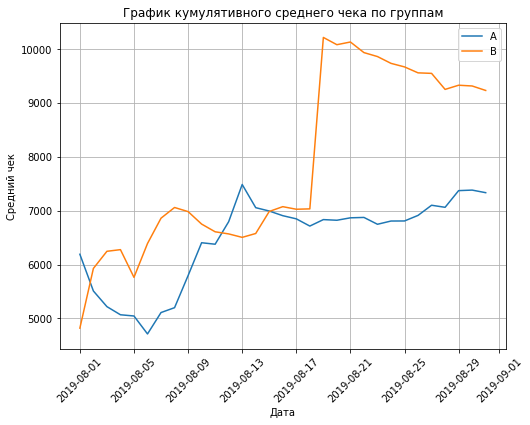

In [27]:
#разделим кумулятивную выручку на кумулятивное кол-во заказов 
plt.figure(figsize = (8, 6))
plt.plot(group_A['date'], group_A['cum_revenue']/group_A['cum_orders'], label = 'A')
plt.plot(group_B['date'], group_B['cum_revenue']/group_B['cum_orders'], label = 'B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation = 45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid();

На графике так же виден **всплеск после 17 числа для группы B**, что может указывать на то, что в выборку попали очень дорогие заказы. 

**Предположение:** группа B будет постепенно снижаться и подходить к реальному среднему чеку, таким образом, есть вероятность, что линии сойдутся. 

#### 3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.

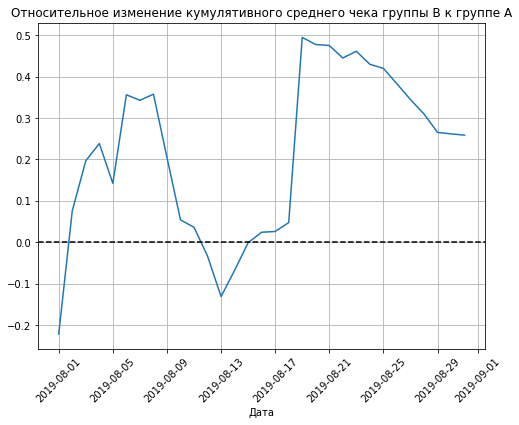

In [28]:
plt.figure(figsize = (8, 6))
plt.plot(group_A['date'], (group_B['cum_revenue']/group_B['cum_orders'])/(group_A['cum_revenue']/group_A['cum_orders'])-1)

#добавим ось y=0
plt.axhline(y=0, color='black', linestyle='--') 

plt.xticks(rotation = 45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.grid();

На графике видны достаточно резкие колебания, что скорее всего связано с выбросами слишком дорогих заказов. 

#### 4.Постройте график кумулятивного среднего количества заказов на посетителя по группам.

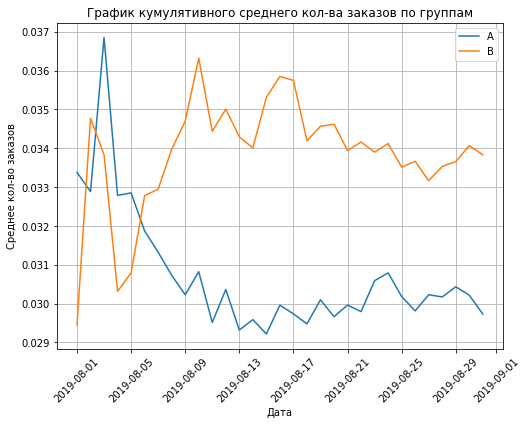

In [29]:
# разделим кумулятивное количество заказов на кумулятивное количество посетителей

plt.figure(figsize = (8, 6))
plt.plot(group_A['date'], group_A['cum_orders']/group_A['cum_visitors'], label = 'A')
plt.plot(group_B['date'], group_B['cum_orders']/group_B['cum_visitors'], label = 'B')
plt.legend()
plt.title('График кумулятивного среднего кол-ва заказов по группам')
plt.xticks(rotation = 45)
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.grid();

Исходя из графика можно сказать, что **для группы B среднее количество заказов на пользователей стабильно выше**, чем для группы A, хотя значения колебаний небольшие. 

**Стоит заметить, что на данном графике нет резких всплесков после 17 числа**, зато встречаются 2 всплеска для двух групп в начале эксперимента, но сложно сказать, с чем именно это связано. Возможно, была акция на количество заказов более 1.

#### 5.Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

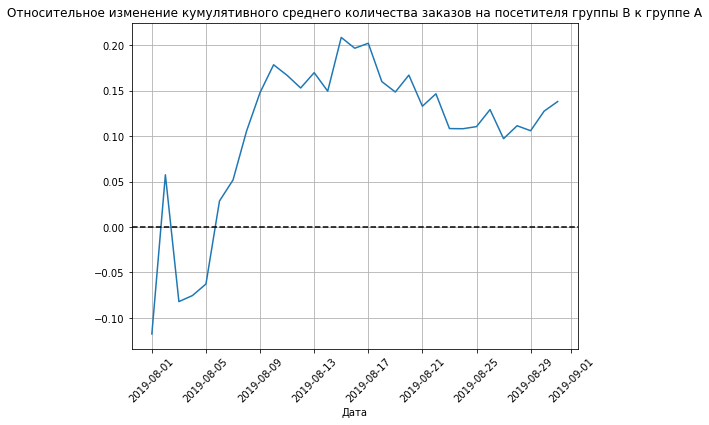

In [30]:
plt.figure(figsize = (8, 6))
plt.plot(group_A['date'], (group_B['cum_orders']/group_B['cum_visitors'])/(group_A['cum_orders']/group_A['cum_visitors'])-1)

#добавим ось y=0
plt.axhline(y=0, color='black', linestyle='--') 

plt.xticks(rotation = 45)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.grid();

Видно, что с определенной даты в начале эксперимента группа B стабильно была выше. К концу месяца график имеет тенденцию к повышению, возможно, еще не установился.

#### 6. Постройте точечный график количества заказов по пользователям. 

In [31]:
# найдем сколько заказов сделал каждый уникальный пользователь
orders_per_user = (
    orders.groupby('visitor_id', as_index = False)
    .agg({'transaction_id': 'nunique'})
    .rename({'transaction_id': 'orders'}, axis = 'columns'))

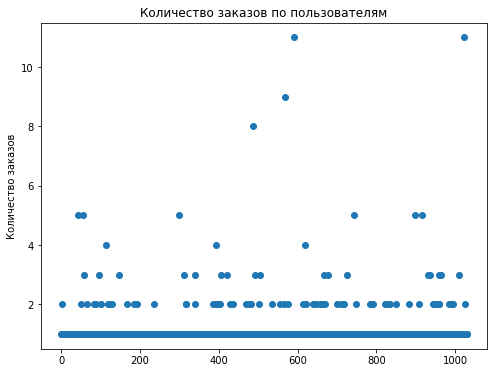

In [32]:
x_values = pd.Series(range(0, len(orders_per_user)))
plt.figure(figsize = (8,6))
plt.ylabel('Количество заказов')
plt.scatter(x_values, orders_per_user['orders'])
plt.title('Количество заказов по пользователям');

На графике видны аномальные значения - **более 4 заказов**. Большинство пользователей совершают по одному заказу, реже по 2.

#### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. 

In [33]:
np.percentile(orders_per_user['orders'], [95, 99])

array([2., 4.])

99% выборки заказывают менее 4 заказов. Думаю, **оптимальной верхней границей количества заказов на пользователя** исходя из перцентилей и точечного графика **будет значения 3-х и менее заказов.**

#### 8. Постройте точечный график стоимостей заказов. 

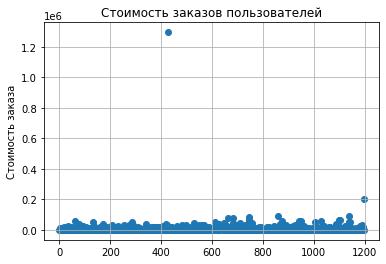

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize = (6,4))
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов пользователей')
plt.grid();

Сразу же заметен **сильный выброс в верху графика.** В целом **большая часть значений находится в диапазоне до 100 000**, но точную границу по графику определить сложно. 

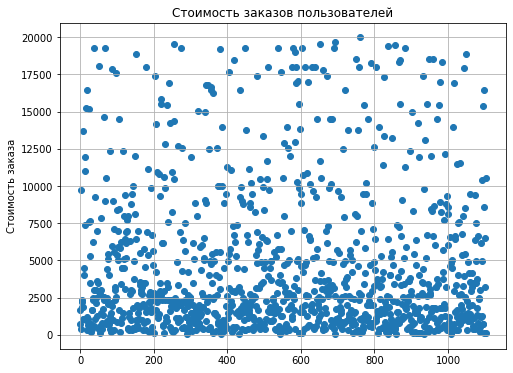

In [35]:
# зададим верхний интервал
x_values = pd.Series(range(0, len(orders.query('revenue < 20000')['revenue'])))

plt.figure(figsize = (8,6))
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders.query('revenue < 20000')['revenue'])
plt.title('Стоимость заказов пользователей')
plt.grid();

**Больше всего заказов до 2500-3000**, затем их количество постепенно уменьшается. 

#### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. 

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Значения 95 и 99 перцентилей отличаются почти в 2 раза, считаю, что в данном случае оптимально взять **значения 59 000 для нижнего предела аномальных значений.** Таким образом, не будем учитывать всего 11 заказов. 

In [37]:
orders[orders['revenue'] > 59000]['revenue'].count()

11

#### 10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

**α**= 0.05

**H0:** Между выборками нет статистически значимых различий. 

**H1:** Между выборками есть статистически значимые различия. 

In [38]:
# создадим функцию avg_amount
#найдем сколько заказов из группы A на одного пользователя из тех, кто заказывал

def avg_amount(group, user_list=None):
    
    if user_list == None:
        user_list = []
    
    orders_per_user = (
    orders.loc[(orders['group'] == group) & (~orders['visitor_id'].isin(user_list))]
    .groupby('visitor_id', as_index = False)
    .agg({'transaction_id': pd.Series.nunique})
     )

#затем создадим массив из 0, для тех посетителей, который не совершили ни одного заказа
    massive = pd.Series(
        0, index = np.arange(
            visitors.loc[visitors['group'] == group]['visitors'].sum()-\
            orders.loc[(orders['group'] == group) & (~orders['visitor_id'].isin(user_list))]['transaction_id'].count()), \
        name = 'orders')

#соединим тех, кто заказывал и тех, кто нет с помощью метода pd.concat
    sample = pd.concat([orders_per_user['transaction_id'], massive], axis = 0)
    
    return sample

In [39]:
sample_A = avg_amount('A')
sample_A.sort_values()

8837     0
11954    0
11953    0
11952    0
11951    0
        ..
18       4
23       4
227      5
278      5
499      7
Length: 18682, dtype: int64

In [40]:
sample_B = avg_amount('B')
sample_B.sort_values()

8844     0
11991    0
11990    0
11989    0
11988    0
        ..
424      4
580      4
501      4
326      5
340      6
Length: 18862, dtype: int64

При сортировке **нет аномальных значений более 10**, которые были ранее замечены на точечном графике. Скорее всего, это именно те пользователи, которые оказались в двух группах сразу. 

In [41]:
round(stats.mannwhitneyu(sample_A, sample_B)[1], 3)

0.017

In [42]:
round(sample_B.mean()/sample_A.mean() - 1, 3)

0.138

Полученное значение менее 0.05, соответственно нулевую гипотезу можно отвергнуть. 

**Вывод: По «сырым» данным различия в среднем количестве заказов на посететиля между группами A и B есть**. Это также подтверждается отношением среднего количества заказов группы B к группе A, оно значительно выше.

#### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [43]:
round(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], 3)

0.729

In [44]:
round(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1, 3)

0.259

Полученное значение больше 0.05, соответственно нулевую гипотезу нельзя отвергнуть. Однако, относительный выйгрыш группы B по отношению к группе A 25%.

**Вывод: По «сырым» данным различий в среднем чеке заказа между группами A и B нет.** 

#### 12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [45]:
# рассчитаем количество заказов на каждого пользователя
orders_per_user = (orders
    .groupby('visitor_id', as_index = False)
    .agg({'transaction_id': pd.Series.nunique})
)

# запишем в список пользователей, которые сделали заказ более 3 раз
abnormal_users = orders_per_user.query('transaction_id > 3')['visitor_id'].to_list()

In [46]:
#найдем тех пользователей, заказ которых превышал 28 000 и объединим этот список с предыдущим
abnormal_users = list(set(abnormal_users + orders.query('revenue > 59000')['visitor_id'].to_list()))

In [47]:
# вызовем функцию и добавим условия, чтобы в данных не было пользователей с более чем 3 заказами и чеком более 28 000.
sample_A = avg_amount('A', abnormal_users)

sample_B = avg_amount('B', abnormal_users)

In [48]:
round(stats.mannwhitneyu(sample_A, sample_B)[1], 3)

0.012

In [49]:
round(sample_B.mean()/sample_A.mean() - 1, 3)

0.154

Полученное значение менее 0.05, соответственно нулевую гипотезу можно отвергнуть. Относительная конверсия группы B к группе А выше на 15%.

**Вывод: По "очищенным" данным различия в среднем количестве заказов на посететиля между группами A и B есть**

#### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [50]:
stats.mannwhitneyu(orders.loc[(orders['group'] == 'A') & (~orders['visitor_id'].isin(abnormal_users))]['revenue'], \
                   orders.loc[(orders['group'] == 'B') & (~orders['visitor_id'].isin(abnormal_users))]['revenue'])[1]

0.9435474585630608

In [51]:
round(orders.loc[(orders['group'] == 'B') & (~orders['visitor_id'].isin(abnormal_users))]['revenue'].mean()\
/orders.loc[(orders['group'] == 'A') & (~orders['visitor_id'].isin(abnormal_users))]['revenue'].mean() - 1, 3)

-0.006

Полученное значение больше 0.05, соответственно нулевую гипотезу нельзя отвергнуть. И после очистки данных от выбросов нет различий в относительной величене среднего чека группы B к группе A.

**Вывод: По «очищенным» данным различий в среднем чеке заказа между группами A и B нет.** При этом после фильтрации данных для двух выборок стало еще меньше отличий.

In [52]:
# составим кумулятивную таблицу для "очищенных" данных
group_A = cum_columns("A", abnormal_users)

group_B = cum_columns("B", abnormal_users)

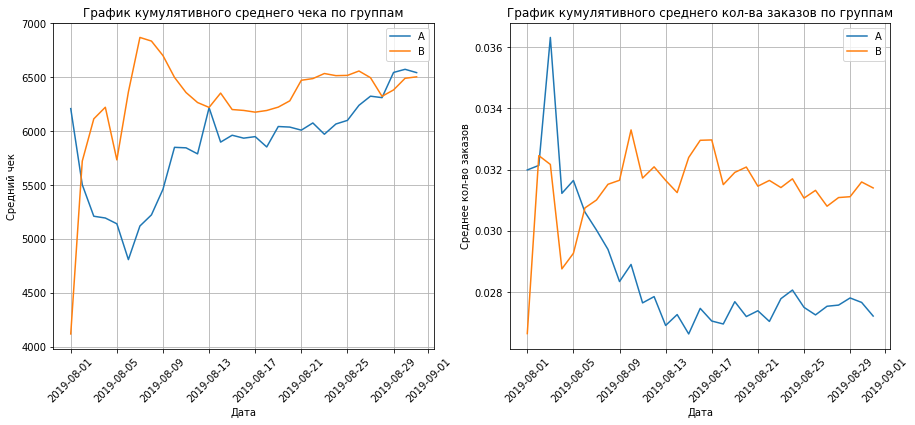

In [53]:
fig, axs = plt.subplots(2, 1, figsize=(15, 6))

plt.subplot(1, 2, 1)
#разделим кумулятивную выручку на кумулятивное кол-во заказов 
plt.plot(group_A['date'], group_A['cum_revenue']/group_A['cum_orders'], label = 'A')
plt.plot(group_B['date'], group_B['cum_revenue']/group_B['cum_orders'], label = 'B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation = 45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid();

# разделим кумулятивное количество заказов на кумулятивное количество посетителей
plt.subplot(1, 2, 2)
plt.plot(group_A['date'], group_A['cum_orders']/group_A['cum_visitors'], label = 'A')
plt.plot(group_B['date'], group_B['cum_orders']/group_B['cum_visitors'], label = 'B')
plt.legend()
plt.title('График кумулятивного среднего кол-ва заказов по группам')
plt.xticks(rotation = 45)
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.grid();

По "очищенным" данным стало очевиднее, что **средний чек для двух групп стремится к одинаковому значению** и размерность графика уменьшилась (изначально средний чек для группы B выбивался до 10 000).

Для группы А количество заказов постепенно снижается и **видна разница для двух групп на последнюю дату теста.**

#### Выводы:

1. Определена гипотеза для проверки: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 


2. Тест проходил на протяжении месяца, не было замечено перекосов по посетителям для двух групп, то есть, для группы А и B было примерно одинаковое распределение посетителей по дням. 
   Было обнаружено, что 58 пользователей (около 5% от всех пользователей) видели 2 версии сайта. 
   
   
3. **По кумулятивной выручке группа B опережает группу А в большей степени за счет выбросов сверх дорогих заказов.**


4. По кумулятивному среднему чеку группа B также находится выше, чем группа A, но это связано с выбросами. **По "сырым" и "очищенным" от выбросов данных не было выявлено статистически значимых различий.** То есть, нововведение не повлияло на средний чек. 


5. По конверсии в покупку группа B находится выше и это не связано с выбросами. **По "сырым" и "очищенным" от выбросов данных были выявлены статистически значимые различия между группами.** Конверсия группы B к группе A выше на 15%. 

Таким образом, A/B тест можно остановить и признать победу группы B. 